In [2]:
#This session is for reading data
import gzip
from collections import defaultdict 
import json


def readJSON(path):
    f = gzip.open(path, 'rt')
    f.readline()
    for l in f:
        yield l

data_rent_the_way = []
for l in readJSON("renttherunway_final_data.json.gz"):

    data_rent_the_way.append(json.loads(l))





do one hot encoding - body type, rented for, category

In [3]:
#This session is one hot encoding code
import numpy as np


body_t_count = defaultdict(int)
rent_for_count = defaultdict(int)
category_count = defaultdict(int)
fit_count = defaultdict(int)
items_count = defaultdict(int)
bsize_count = defaultdict(int)

count_missing_bt = 0 
count_missing_rent_for = 0

bsize_fit_count = defaultdict(lambda: np.array([0, 0, 0]))

category_fit_count = defaultdict(lambda: np.array([0, 0, 0],dtype=float))

fit_index = {"small":0, "fit":1,"large":2}

count_btype_fit_not_null = defaultdict(int)


btype_fit_count = defaultdict(lambda: np.array([0, 0, 0],dtype=float))

for d in data_rent_the_way:

    bt = None
    if('body type' in d):
        bt = d['body type']
        body_t_count[bt] += 1
    else:
        count_missing_bt += 1
    if('rented for' in d):
        rent_for_count[d['rented for']] += 1
    else:
        count_missing_rent_for += 1
    
    if('fit' in d):
        fitting = d['fit']
        fit_count[fitting] += 1

        category_fit_count[d['category']][fit_index[fitting]] = 1 + category_fit_count[d['category']][fit_index[fitting]]
        if(bt is not None):
            btype_fit_count[bt][fit_index[fitting]] += 1
            count_btype_fit_not_null[bt] += 1

    if('item_id' in d):
        items_count[d['item_id']] += 1
    if("bust size" in d):
        bsize_count[d["bust size"]] += 1
        if(fitting == 'small'):
            bsize_fit_count[d['bust size']][0] += 1
        if(fitting == 'fit'):
            bsize_fit_count[d['bust size']][1] += 1
        if(fitting == 'large'):
            bsize_fit_count[d['bust size']][2] += 1
        
    category_count[d['category']] += 1

    

print(fit_count)


body_t_one_hot = defaultdict(int)
rf_one_hot = defaultdict(int)
category_one_hot = defaultdict(int)



print(count_missing_bt, " of body type count is missing")
print(count_missing_rent_for, " of rent_for are missing")


# one hot encoding for boudy type
bt_keys = list(body_t_count.keys())
bt_one_hot_to_orig = defaultdict(str)

total_bt = len(body_t_count)
for i in range(len(bt_keys)):
    one_hot = np.zeros(len(body_t_count) - 1, dtype=int)
    if(i != total_bt - 1):
        one_hot[i] = 1
    
    str_one_hot = ''.join(map(str, one_hot))
    body_t_one_hot[bt_keys[i]] =  str_one_hot
    bt_one_hot_to_orig[str_one_hot] = bt_keys[i]


#one hot encoding for rent for
rf_keys = list(rent_for_count.keys())
rf_one_hot_to_orig = defaultdict(str)

total_rf = len(rent_for_count)
for i in range(len(rf_keys)):
    one_hot = np.zeros(len(rent_for_count) - 1, dtype=int)
    if(i != total_rf - 1):
        one_hot[i] = 1
    
    str_one_hot = ''.join(map(str, one_hot))
    rf_one_hot[rf_keys[i]] =  str_one_hot
    rf_one_hot_to_orig[str_one_hot] = rf_keys[i]

#one hot encoding for catagory 
cat_keys = list(category_count.keys())
cat_one_hot_to_orig = defaultdict(str)

total_cat = len(category_count)
for i in range(len(cat_keys)):
    one_hot = np.zeros(len(category_count) - 1, dtype=int)
    if(i != total_cat - 1):
        one_hot[i] = 1
    
    str_one_hot = ''.join(map(str, one_hot))
    category_one_hot[cat_keys[i]] =  str_one_hot
    cat_one_hot_to_orig[str_one_hot] = cat_keys[i]

#one hot encoding for fit 
fit_keys = list(fit_count.keys())
fit_one_hot_to_orig = defaultdict(str)
fit_one_hot = defaultdict(str)

total_fit = len(fit_count)

for i in range(len(fit_keys)):
    one_hot = np.zeros(len(fit_count) - 1, dtype=int)
    if(i != total_fit - 1):
        one_hot[i] = 1
    
    str_one_hot = ''.join(map(str, one_hot))
    fit_one_hot[fit_keys[i]] =  str_one_hot
    cat_one_hot_to_orig[str_one_hot] = fit_keys[i]


#one hot encoding for bust size
bsize_keys = list(bsize_count.keys())
bsize_one_hot_to_orig = defaultdict(str)
bsize_one_hot = defaultdict(str)

total_bsize = len(bsize_count)

for i in range(len(bsize_keys)):
    one_hot = np.zeros(len(bsize_count) - 1, dtype=int)
    if(i != total_bsize - 1):
        one_hot[i] = 1
    
    str_one_hot = ''.join(map(str, one_hot))
    bsize_one_hot[bsize_keys[i]] =  str_one_hot
    bsize_one_hot_to_orig[str_one_hot] = bsize_keys[i]

#one hot encoding for item id
item_keys = list(items_count.keys())
item_one_hot_to_orig = defaultdict(str)
item_one_hot = defaultdict(str)

total_items= len(items_count)

for i in range(len(items_count)):
    one_hot = np.zeros(len(items_count) - 1, dtype=int)
    if(i != total_items - 1):
        one_hot[i] = 1
    
    str_one_hot = ''.join(map(str, one_hot))
    item_one_hot[item_keys[i]] =  str_one_hot
    bsize_one_hot_to_orig[str_one_hot] = item_keys[i]




defaultdict(<class 'int'>, {'fit': 142057, 'small': 25779, 'large': 24707})
14637  of body type count is missing
10  of rent_for are missing


In [117]:
for i in btype_fit_count:
    for j in range(3):
       btype_fit_count[i][j] /= count_btype_fit_not_null[i]
        # print(category_count[i] )



In [118]:
btype_fit_count

defaultdict(<function __main__.<lambda>()>,
            {'straight & narrow': array([0.1336318 , 0.74603175, 0.12033645]),
             'pear': array([0.12681274, 0.72902643, 0.14416083]),
             'athletic': array([0.13648751, 0.7432844 , 0.12022809]),
             'hourglass': array([0.13187468, 0.73814772, 0.1299776 ]),
             'full bust': array([0.14247634, 0.71797947, 0.13954418]),
             'petite': array([0.12611269, 0.74312051, 0.1307668 ]),
             'apple': array([0.14865696, 0.71498872, 0.13635432])})

In [79]:
for i in category_fit_count:
    for j in range(3):
        category_fit_count[i][j] = float(category_fit_count[i][j]) / float(category_count[i])
        # print(category_count[i] )

category_fit_count

defaultdict(<function __main__.<lambda>()>,
            {'gown': array([0.10673486, 0.79261396, 0.10065118]),
             'sheath': array([0.16219714, 0.75320977, 0.08459308]),
             'dress': array([0.14734508, 0.7166681 , 0.13598682]),
             'leggings': array([0.07142857, 0.78571429, 0.14285714]),
             'top': array([0.10565808, 0.73169742, 0.16264449]),
             'jumpsuit': array([0.12962963, 0.74575617, 0.1246142 ]),
             'sweater': array([0.09573542, 0.71192341, 0.19234117]),
             'jacket': array([0.15058236, 0.69925125, 0.15016639]),
             'shirtdress': array([0.06995885, 0.69547325, 0.2345679 ]),
             'maxi': array([0.08306709, 0.75660761, 0.1603253 ]),
             'shift': array([0.15023299, 0.68350419, 0.16626281]),
             'romper': array([0.11176279, 0.73216031, 0.1560769 ]),
             'pants': array([0.10189573, 0.62322275, 0.27488152]),
             'shirt': array([0.10469314, 0.63176895, 0.26353791]),
      

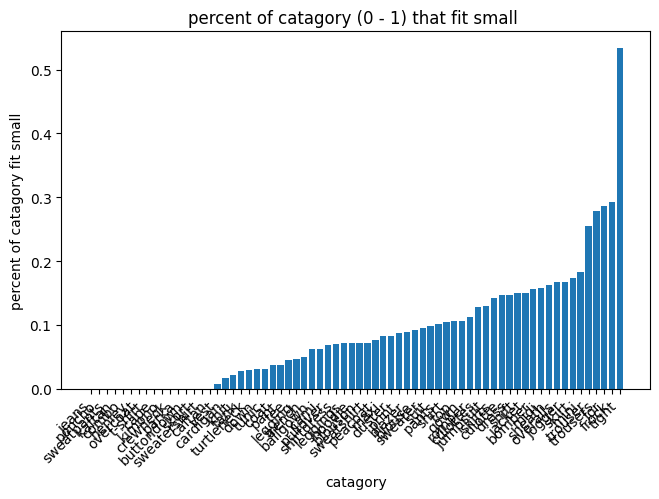

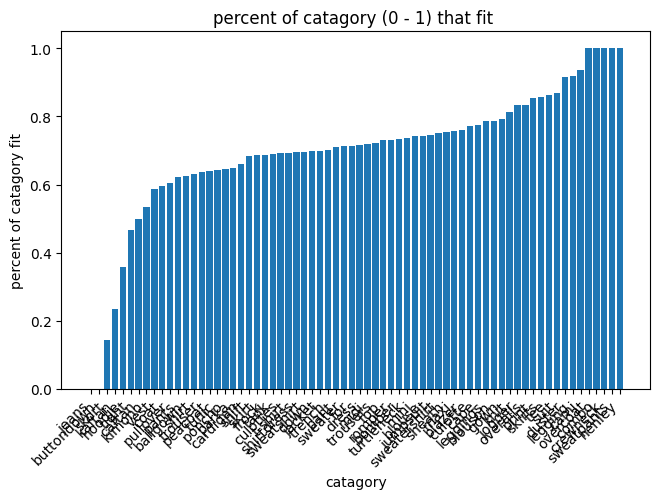

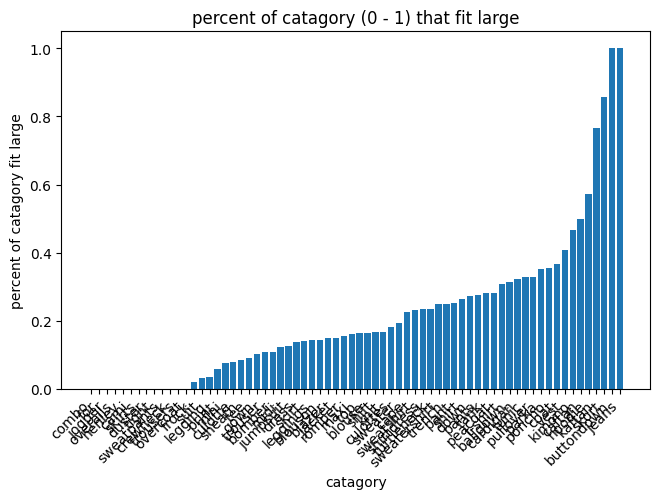

In [98]:
import matplotlib.pyplot as plt
small_percent = []
x = []

for i in category_fit_count:
    one_small_percent = category_fit_count[i][0]
    small_percent.append(one_small_percent)
    x.append(i)

small_percent = np.array(small_percent)
x = np.array(x)
sort_small = np.argsort(small_percent)
# print(small_percent[sort_small])

y_axis = small_percent[sort_small]
x_axis = x[sort_small]

plt.bar(x_axis, y_axis)

plt.xlabel('catagory')
plt.ylabel('percent of catagory fit small')
plt.title('percent of catagory (0 - 1) that fit small ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=0.00001, w_pad= 000000.1)
plt.show()


fit_percent = []
x = []

for i in category_fit_count:
    one_fit_percent = category_fit_count[i][1]
    fit_percent.append(one_fit_percent)
    x.append(i)

fit_percent = np.array(fit_percent)
x = np.array(x)
sort_fit = np.argsort(fit_percent)
# print(small_percent[sort_small])

y_axis = fit_percent[sort_fit]
x_axis = x[sort_fit]

plt.bar(x_axis, y_axis)

plt.xlabel('catagory')
plt.ylabel('percent of catagory fit')
plt.title('percent of catagory (0 - 1) that fit ')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=0.00001, w_pad= 000000.1)
plt.show()


large_percent = []
x = []

for i in category_fit_count:
    one_fit_percent = category_fit_count[i][2]
    large_percent.append(one_fit_percent)
    x.append(i)

large_percent = np.array(large_percent)
x = np.array(x)
sort_fit_large = np.argsort(large_percent)
# print(small_percent[sort_small])

y_axis = large_percent[sort_fit_large]
x_axis = x[sort_fit_large]

plt.bar(x_axis, y_axis)

plt.xlabel('catagory')
plt.ylabel('percent of catagory fit large')
plt.title('percent of catagory (0 - 1) that fit large')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=0.00001, w_pad= 000000.1)
plt.show()

    

In [55]:
print(len(list(category_count.keys())))

68


In [4]:
bsize_fit_count

defaultdict(<function __main__.<lambda>()>,
            {'34b': array([ 3506, 20386,  3393]),
             '34c': array([ 3137, 16930,  3072]),
             '32b': array([1302, 8118, 1491]),
             '34d+': array([ 182, 1049,  186]),
             '36d': array([1643, 8150, 1329]),
             '36a': array([ 285, 1530,  272]),
             '34d': array([ 2516, 13216,  2296]),
             '32d+': array([105, 709, 116]),
             '36c': array([ 1852, 10065,  1599]),
             '32c': array([1248, 7328, 1367]),
             '32dd': array([ 242, 1236,  236]),
             '30dd': array([14, 74, 14]),
             '32d': array([1557, 8126, 1513]),
             '36b': array([1366, 7121, 1189]),
             '34a': array([ 992, 5886, 1013]),
             '34dd': array([ 363, 1956,  346]),
             '40ddd/e': array([ 4, 33, 10]),
             '32a': array([ 585, 3811,  698]),
             '38d+': array([ 91, 487,  83]),
             '38c': array([ 363, 1969,  337]),
            

In [4]:
#Function you can call for One hot encoding


# @return the one hot encoding of the body type
# @param: type: string     the body type that are in the renttherunaway database
def get_body_type_one_hot(bodyTypeName):
    return body_t_one_hot[bodyTypeName]

# @return: the body type that are in the renttherunaway database
# @param type: string    the one hot encoding of the body type
def body_type_one_hot_to_original(one_hot: str):
    return bt_one_hot_to_orig[one_hot]

# @return the one hot encoding of the rent for 
# @param: type: string     the rent for that are in the renttherunaway database
def rent_for_one_hot(rentForType):
    return rf_one_hot[rentForType]

# @return: the rent for that are in the renttherunaway database
# @param type: string    the one hot encoding of the rent for
def rent_for_one_hot_to_original(one_hot: str):
    return rf_one_hot_to_orig[one_hot]


# @return the one hot encoding of the catagory
# @param: type: string     the catagory for that are in the renttherunaway database
def catagory_for_one_hot(catType):
    return category_one_hot[catType]

# @return: the rent for that are in the renttherunaway database
# @param type: string    the one hot encoding of the rent for
def catagory_one_hot_to_original(one_hot: str):
    return cat_one_hot_to_orig[one_hot]


# @return the one hot encoding of the catagory
# @param: type: string     the catagory for that are in the renttherunaway database
def fit_for_one_hot(fit):
    return fit_one_hot[fit]

# @return: the fit that are in the renttherunaway database
# @param type: string    the one hot encoding of the fit
def fit_one_hot_to_original(one_hot: str):
    return fit_one_hot_to_orig[one_hot]

# @return the one hot encoding of the bust size
# @param: type: string     the bust size for that are in the renttherunaway database
def bsize_for_one_hot(bsize):
    return bsize_one_hot[bsize]

# @return: the fit that are in the renttherunaway database
# @param type: string    the one hot encoding of the fit
def bsize_one_hot_to_original(one_hot: str):
    return bsize_one_hot_to_orig[one_hot]


# @return the one hot encoding of the bust size
# @param: type: string     the bust size for that are in the renttherunaway database
def get_item_one_hot(item_id):
    return item_one_hot[item_id]

# @return: the fit that are in the renttherunaway database
# @param type: string    the one hot encoding of the fit
def item_one_hot_to_original(one_hot: str):
    return item_one_hot_to_orig[one_hot]



In [6]:
print(bsize_one_hot)

defaultdict(<class 'str'>, {'34b': '100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '34c': '010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '32b': '001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '34d+': '000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '36d': '000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '36a': '000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '34d': '000000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '32d+': '000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000', '36c': '0000000010000000000000000000000000

46113
15
percent of data entry with at least one missing data 0.23949455446315887
missing data count_numbers for each feature: defaultdict(<class 'int'>, {0: 146430, 3: 2756, 1: 30305, 2: 13052})


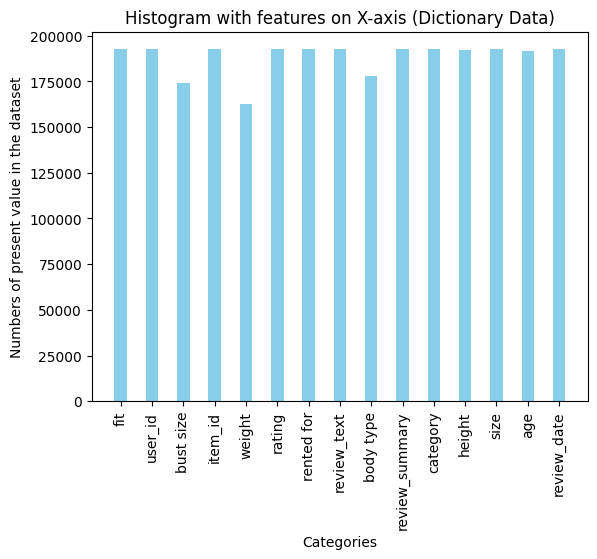

In [7]:
import matplotlib.pyplot as plt
count_present_feature = defaultdict(int)
count_numbers_missed_each_interactions = defaultdict(int)
count_total_miss_interaction = 0

for i in range(len(data_rent_the_way)):
    one_interaction = data_rent_the_way[i].keys()
    count_sum_fea = 0
    for d in one_interaction:
        count_present_feature[d] += 1
        count_sum_fea += 1
    count_numbers_missed_each_interactions[15 - count_sum_fea] += 1
    if(count_sum_fea != 15):
        count_total_miss_interaction += 1

print(count_total_miss_interaction)
print(count_sum_fea)
        
pecen = count_total_miss_interaction / len(data_rent_the_way)
print("percent of data entry with at least one missing data", pecen)

print("missing data count_numbers for each feature:", count_numbers_missed_each_interactions)

categories = list(count_present_feature.keys())
values = list(count_present_feature.values())

# Plotting the histogram
plt.bar(categories, values, color='skyblue', width=0.4)

# Adding labels and title
plt.xlabel('Categories')
plt.ylabel('Numbers of present value in the dataset')

plt.xticks(rotation='vertical')
plt.title('Histogram with features on X-axis (Dictionary Data)')

# Show the plot
plt.show()

In [8]:
#convert time stamp and transform data entries to dict
from datetime import datetime


date_format = "%B %d, %Y"
for i in range(len(data_rent_the_way)):
    
    data_rent_the_way[i]['review_date'] = datetime.strptime(data_rent_the_way[i]['review_date'], date_format).timestamp()



In [9]:
print(data_rent_the_way[:5])

[{'fit': 'fit', 'user_id': '273551', 'bust size': '34b', 'item_id': '153475', 'weight': '132lbs', 'rating': '10', 'rented for': 'other', 'review_text': 'I rented this dress for a photo shoot. The theme was "Hollywood Glam and Big Beautiful Hats". The dress was very comfortable and easy to move around in. It is definitely on my list to rent again for another formal event. ', 'body type': 'straight & narrow', 'review_summary': 'I felt so glamourous!!!', 'category': 'gown', 'height': '5\' 6"', 'size': 12, 'age': '36', 'review_date': 1371538800.0}, {'fit': 'fit', 'age': '116', 'size': 4, 'item_id': '1063761', 'rating': '10', 'rented for': 'party', 'review_text': 'This hugged in all the right places! It was a perfect dress for my event and I received so many compliments on it. Not to mention customer service was great getting this to me in less than 24 hours!', 'review_summary': 'It was a great time to celebrate the (almost) completion of my first year of law school.', 'category': 'sheath',

In [10]:
users_interactions_count = defaultdict(int)
items_interactions_count = defaultdict(int)
for d in data_rent_the_way:
    users_interactions_count[d['user_id']] += 1
    items_interactions_count[d['item_id']] += 1

print("number of users", len(list(users_interactions_count.keys())))
print("number of items", len(list(items_interactions_count.keys())))

sorted_items = sorted(items_interactions_count.items(), key=lambda x: x[1], reverse=True)
print(sorted_items[:5])




number of users 105571
number of items 5850
[('126335', 2241), ('174086', 1724), ('123793', 1714), ('132738', 1582), ('145906', 1478)]


In [11]:
my_dict = {'A': 50, 'B': 30, 'C': 70, 'D': 40}

# Sorting the dictionary items based on values in descending order
sorted_items = sorted(my_dict.items(), key=lambda x: x[1], reverse=True)

# Creating a new dictionary from the sorted items
ranked_dict = {k: v for k, v in sorted_items}

print(ranked_dict)

{'C': 70, 'A': 50, 'D': 40, 'B': 30}


5850


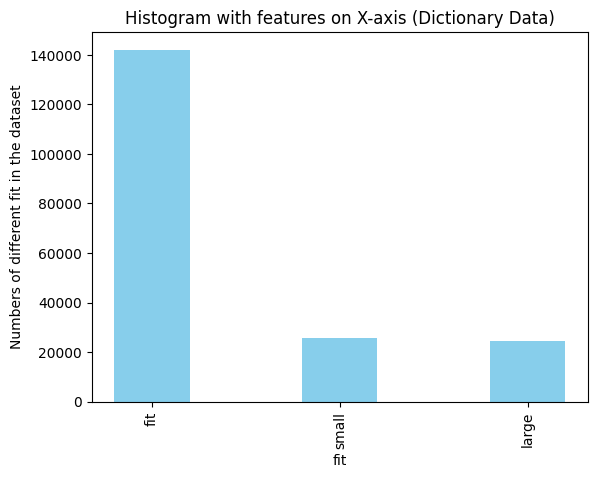

In [12]:
#fit data
print(len(items_count))
fit_data = list(fit_count.keys())
fit_values = list(fit_count.values())

# Plotting the histogram
plt.bar(fit_data, fit_values, color='skyblue', width=0.4)

# Adding labels and title
plt.xlabel('fit')
plt.ylabel('Numbers of different fit in the dataset')

plt.xticks(rotation='vertical')
plt.title('Histogram with features on X-axis (Dictionary Data)')

fit_datas = defaultdict(list)

# for d in data_rent_the_way:
#     fit_datas[fit_one_hot(d['fit'])].append()
    
    

# Show the plot
plt.show()

In [13]:
import statistics
user_id = set()
for d in data_rent_the_way:
    user_id.add(d['user_id'])
print(len(user_id))
print(len(data_rent_the_way))
print(statistics.mean(items_count.values()))

105571
192543
32.913333333333334


In [14]:
#checking if there is missing value with keys presented

for d in data_rent_the_way:
    one_entries_keys = list(d.keys())
    for one_key in categories:
        
        if(one_key in one_entries_keys):
            if(d[one_key] == ""):
                print("have empty ", one_key)
            if(d[one_key] == None):
                print("have empty ", one_key)


have empty  review_summary
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  review_summary
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  review_summary
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  review_summary
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  review_summary
have empty  rating
have empty  rating
have empty  review_summary
have empty  rating
have empty  rating
have empty  rating
have empty  review_text
have empty  review_summary
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have empty  rating
have emp

In [15]:
print(categories)

['fit', 'user_id', 'bust size', 'item_id', 'weight', 'rating', 'rented for', 'review_text', 'body type', 'review_summary', 'category', 'height', 'size', 'age', 'review_date']


 'weight' 'bust size' body type height size age 

In [16]:

def convert_weight_from_string(s):
    numeric_part = ""
    
    for char in s:
        if char.isdigit():
            numeric_part += char
        else:
            break  # Exit the loop if a non-digit character is encountered
    
    if numeric_part:
        return int(numeric_part)
    else:
        return None  # or raise an exception, depending on your needs
    
def height_to_cm(height_str):
    # Split the input string into feet and inches
    feet, inches = map(int, height_str.replace('"', '').split("'"))

    # Convert feet and inches to centimeters
    height_cm = (feet * 30.48) + (inches * 2.54)

    return "{:.2f}".format(height_cm)

# Example usage:
height_str = "5' 7\""
height_cm = height_to_cm(height_str)

print(f"{height_str} is approximately {height_cm} cm")



5' 7" is approximately 170.18 cm


In [5]:
from sklearn.utils import shuffle
transformed_dataX = []
transformed_Y = []

for d in data_rent_the_way:
    one_entries_keys = list(d.keys())

    if('category' in one_entries_keys and 'size' != None and 'rating' in one_entries_keys and d['rating'] != None and 'fit' in d):
        fitting = d['fit']

        transformed_Y.append(fitting)

        # item = get_item_one_hot(d['item_id'])
        # weight = convert_weight_from_string(d['weight'])
        # bsize = bsize_for_one_hot(d['bust size'])
        # height = height_to_cm(d["height"])
        # btype = get_body_type_one_hot(d["body type"])

        catagory = catagory_for_one_hot(d["category"])
    
        # oneX = np.array([weight, bsize, height, btype, catagory, d['size'], item],dtype=float)
        oneX = np.array([catagory,d['rating']],dtype=float)

        transformed_dataX.append(oneX)


transformed_dataX = np.array(transformed_dataX)
transformed_Y = np.array(transformed_Y) 
       

X, y = shuffle(transformed_dataX, transformed_Y, random_state=42)
cut_off_in = int(len(y) * 0.9)

train_data = X[:cut_off_in]
train_label = y[:cut_off_in]

test_data = X[cut_off_in:]
test_label = y[cut_off_in:]



In [13]:
#under sampling data 
# from imblearn.under_sampling import ClusterCentroids
# cc = ClusterCentroids(random_state=0)
# X_resampled, y_resampled = cc.fit_resample(X, y)

#oversmaling using SMOTE due to ClusterCentroids taking so long to run
from imblearn.over_sampling import SMOTE
from collections import Counter
sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({'small': 141994, 'fit': 141994, 'large': 141994})


In [18]:
print(transformed_dataX[0])

[1.3200e+002 1.0000e+104 1.6764e+002 1.0000e+005 1.0000e+066 1.2000e+001]


In [6]:
from sklearn.linear_model import LogisticRegression


from sklearn.model_selection import cross_validate



bestC = 1
best_accur = 0
for c in range(1,11):

    clf_lgr = LogisticRegression(C=c/100)
    # clf.fit(train_data, train_label)
    cv = cross_validate(clf_lgr,train_data,train_label)
    test_score_list = cv['test_score']
    score = np.mean(test_score_list)
    if(score > best_accur):
        best_accur = score
        bestC = c/100

clf_lgr = LogisticRegression(C=bestC, class_weight="balanced")
clf_lgr.fit(train_data, train_label)
predictions_linear_regression = clf_lgr.predict(test_data)

accuracy_lgr = sum(1 for (p,l) in zip(predictions_linear_regression, test_label) if p == l) / len(test_label)
print(accuracy_lgr)






/Users/jasonli/opt/anaconda3/envs/cse158/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/jasonli/opt/anaconda3/envs/cse158/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

0.7348158154517587


/Users/jasonli/opt/anaconda3/envs/cse158/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#baseline model for unsampling class that always preict the most popular class
tp_base_unbal = sum(1 for l in test_label if l == 'fit')
fp_base_unbal = sum(1 for l in test_label if l != 'fit')
fn_base_unbal = 0

precision_base_unbal = tp_base_unbal / (tp_base_unbal + fp_base_unbal)
recall_base_unbal = tp_base_unbal / (tp_base_unbal + fn_base_unbal)
f1_base_unbal = 2 * precision_base_unbal * recall_base_unbal / (recall_base_unbal + precision_base_unbal)

print("Stat for unbalanced dataset using baseline model (always predicting the most popular class). Precision: ", precision_base_unbal, "; Recall: ", recall_base_unbal, ". f1 = ", f1_base_unbal)

Stat for unbalanced dataset using baseline model (always predicting the most popular class). Precision:  0.7348158154517587 ; Recall:  1.0 . f1 =  0.8471398622342018


In [15]:
#get the precision, recall, F1 score for unbalanced dataset for the logistic regression classifier
tp_unbal_lg = 0
fp_unbal_lg = 0
fn_unbal_lg = 0
for i in range (len(predictions_linear_regression)):
    predictions = predictions_linear_regression[i]
    actual = test_label[i]
    if(predictions == 'fit' and actual == 'fit'):
        tp_unbal_lg += 1
    if(predictions == 'fit' and actual != 'fit'):
        fp_unbal_lg += 1
    if(predictions != 'fit' and actual == 'fit'):
        fn_unbal_lg += 1

precision_lg_unbal = tp_unbal_lg / (tp_unbal_lg + fp_unbal_lg)
recall_lg_unbal = tp_unbal_lg / (tp_unbal_lg + fn_unbal_lg)
f1_lg_unbal = 2 * precision_lg_unbal * recall_lg_unbal / (recall_lg_unbal + precision_lg_unbal)

print("Stat for unbalanced dataset using logistics regression. Precision: ", precision_lg_unbal, "; Recall: ", recall_lg_unbal, ". f1 = ", f1_lg_unbal)
    


Stat for unbalanced dataset using logistics regression. Precision:  0.7348158154517587 ; Recall:  1.0 . f1 =  0.8471398622342018


In [16]:
accuracy_lgr = sum(1 for (p,l) in zip(predictions_linear_regression, test_label) if p == l) / len(test_label)
print(accuracy_lgr)

0.7348158154517587


In [8]:
from sklearn import metrics
f1_score = metrics.f1_score(test_label, predictions_linear_regression, average='weighted',zero_division=0)
print(f1_score)

0.6224917686693155


In [9]:
print("accuracy for logistic regression ", accuracy_lgr)

accuracy for logistic regression  1.0


In [ ]:
print(bestC)

0.01


In [ ]:
from sklearn.svm import SVC



bestC = 0
best_accur = 0
for c in [0.01,0.1,1,5,10]:
    clf = SVC(C=c)
    # clf.fit(train_data, train_label)
    cv = cross_validate(clf,train_data,train_label)
    test_score_list = cv['test_score']
    score = np.mean(test_score_list)
    if(score > best_accur):
        best_accur = score
        bestC = c





In [130]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
clf = make_pipeline(StandardScaler(), SVC(C=100, class_weight="balanced"))
clf.fit(train_data, train_label)
predictions = clf.predict(test_data)

accuracy = sum(1 for (p,l) in zip(predictions, test_label) if p == l)
print(sum(1 for p in predictions_linear_regression if p == 'fit') / len(test_label))

In [34]:
print(transformed_dataX[0])

[1.3200e+002 1.0000e+104 1.6764e+002 1.0000e+005 1.2000e+001]


In [10]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
clf_rf.fit(train_data, train_label)
predictions_rf = clf_rf.predict(test_data)




/Users/jasonli/opt/anaconda3/envs/cse158/lib/python3.9/site-packages/sklearn/utils/_array_api.py:380: RuntimeWarning: overflow encountered in cast
  array = numpy.asarray(array, order=order, dtype=dtype)


ValueError: Input X contains infinity or a value too large for dtype('float32').

In [49]:
accuracy_p_fit = sum(1 for (p,l) in zip(predictions_rf, test_label) if p == l) / len(test_label)
print(accuracy_p_fit)

0.5968928863450531


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB


gnb = GaussianNB()
y_pred = gnb.fit(train_data, train_label).predict(test_data)
accuracy = sum(1 for (p,l) in zip(y_pred, test_label) if p == l) / len(test_label)
print(accuracy)


0.7348158154517587
